Dataset Shape: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   income           200 non-null    float64
 1   age              200 non-null    int64  
 2   debt             200 non-null    float64
 3   payment_history  200 non-null    int64  
 4   credit_cards     200 non-null    int64  
 5   default          200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB
Dataset Info:
 None
Missing values:
 income             0
age                0
debt               0
payment_history    0
credit_cards       0
default            0
dtype: int64
         income  age          debt  payment_history  credit_cards  default
0  57450.712295   22  21024.614609                0             4        0
1  47926.035482   46   9016.697654                0             3        0
2  59715.328072   37  18853.391648                1  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Precision: 0.6666666666666666
Recall: 0.125
F1-Score: 0.21052631578947367
ROC-AUC: 0.5416666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.96      0.75        24
           1       0.67      0.12      0.21        16

    accuracy                           0.62        40
   macro avg       0.64      0.54      0.48        40
weighted avg       0.64      0.62      0.54        40



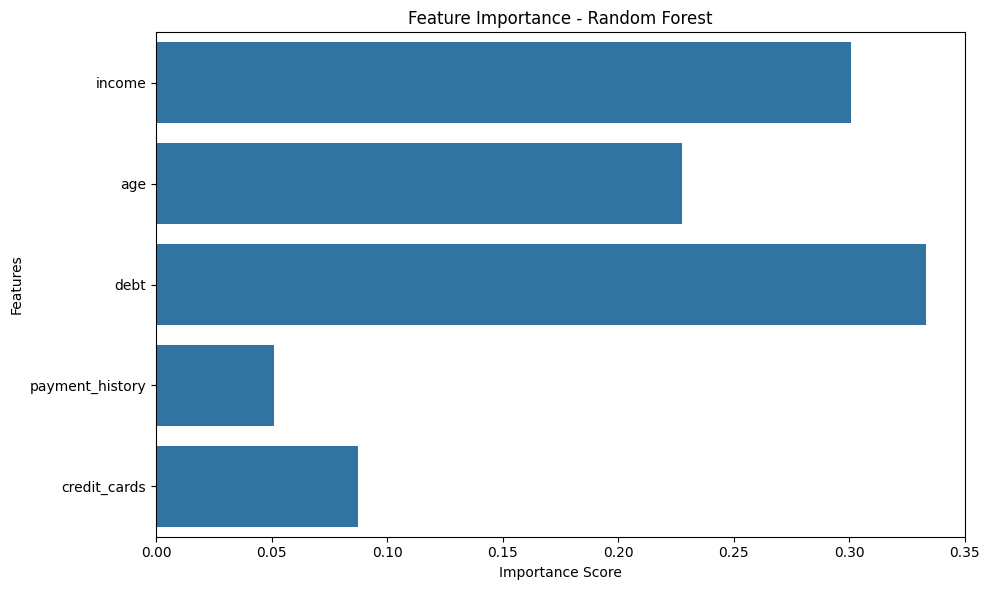

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load the Dataset
# Example CSV file (you can replace 'credit_data.csv' with your actual dataset file)
data = pd.read_csv('credit_data.csv')

# Step 3: Data Overview
print("Dataset Shape:", data.shape)
print("Dataset Info:\n", data.info())
print("Missing values:\n", data.isnull().sum())
print(data.head())

# Step 4: Data Preprocessing
# Drop rows with missing values (or you can impute if necessary)
data = data.dropna()

# If categorical features exist, encode them
data = pd.get_dummies(data, drop_first=True)

# Step 5: Feature & Target Separation
X = data.drop('default', axis=1)  # 'default' is the target variable
y = data['default']

# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Model Training & Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    print(f"\n{'='*30}\nModel: {name}\n{'='*30}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Feature Importance for Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualizing Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
